# **Data Understanding**

## **1. Pendahuluan**
Tahapan `Data Understanding` adalah fase awal dalam siklus hidup proyek data science. Tujuannya adalah untuk mendapatkan pemahaman mendalam tentang data yang akan digunakan. Pada tahap ini, kita akan melakukan analisis eksplorasi awal untuk mengidentifikasi karakteristik, kualitas, dan pola dalam data. Proses ini sangat krusial karena kualitas data akan sangat memengaruhi kualitas model yang akan dibangun.

**Dokumen ini akan memandu proses `data understanding` yang meliputi:**

- Menghubungkan dan mengambil data dari database PostgreSQL.

- Menganalisis tipe data dari setiap kolom.

- Mengevaluasi kualitas data, termasuk analisis outlier, konsistensi data, dan penanganan missing value.

## **2. Impor Library yang Dibutuhkan**
Sel pertama ini berisi semua `library Python` yang akan kita gunakan selama proses analisis. Mengumpulkannya di satu tempat membuat kode lebih terorganisir.

In [1]:
%pip install -q psycopg2-binary sqlalchemy pandas numpy seaborn

# Import library untuk koneksi database
import psycopg2
from sqlalchemy import create_engine

# Import library untuk analisis dan manipulasi data
import pandas as pd
import numpy as np

# Import library untuk visualisasi (opsional, namun sangat membantu)
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ Semua library berhasil diimpor.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.0 MB/s eta 0:00:00
✅ Semua library berhasil diimpor.


### **3. Koneksi ke Database PostgreSQL dan Pengambilan Data**

Langkah selanjutnya adalah menghubungkan notebook ini dengan database PostgreSQL tempat data disimpan. Kita akan menggunakan sqlalchemy untuk membuat koneksi dan pandas untuk mengeksekusi query SQL dan menyimpannya ke dalam DataFrame.

In [8]:
# Ganti dengan kredensial database PostgreSQL Anda
db_user = 'avnadmin'
db_password = 'AVNS_gWQGvuYxlj2_ofPI3uq'
db_host = 'tory-psd-sains-data.d.aivencloud.com'
db_port = '12480'
db_name = 'defaultdb'

# Membuat connection string
conn_string = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Membuat engine koneksi ke database
try:
    engine = create_engine(conn_string)
    print("Koneksi ke database PostgreSQL berhasil!")
except Exception as e:
    print(f"Terjadi kesalahan saat koneksi: {e}")

# --- PENGAMBILAN DATA ---
# Query SQL diubah untuk mengambil data dari tabel 'mahasiswa_akademik'
sql_query = "SELECT * FROM mahasiswa_akademik;"

# Mengambil data menggunakan pandas dan koneksi engine
try:
    df_db = pd.read_sql(sql_query, engine)
    print("Data mahasiswa berhasil diambil dari tabel 'mahasiswa_akademik'.")
except Exception as e:
    print(f"Terjadi kesalahan saat mengambil data: {e}")

# Menampilkan 5 baris pertama dari data untuk memastikan data berhasil dimuat
df_db.head()

Koneksi ke database PostgreSQL berhasil!
Data mahasiswa berhasil diambil dari tabel 'mahasiswa_akademik'.


,id_mahasiswa,nama_mahasiswa,angkatan,fakultas,prodi,jenis_kelamin,asal_sma,ipk_semester_1,ipk_semester_2,ipk_semester_3,ipk_semester_4,sks_semester_1,sks_semester_2,sks_semester_3,sks_semester_4,status_do
0,MHS001,Budi Santoso,2022,Teknik,Informatika,Laki-laki,SMA,3.5,3.6,3.40,3.7,20,21.0,20.0,22.0,0
1,MHS002,Citra Lestari,2022,Hukum,Ilmu Hukum,P,SMA,3.2,3.3,3.10,3.4,18,20.0,19.0,20.0,0
2,MHS003,Doni Setiawan,2022,Teknik,Informatika,L,SMK,2.1,2.5,2.20,NaN,20,18.0,15.0,NaN,1
3,MHS004,Eka Putri,2022,Ekonomi,Manajemen,Perempuan,SMA,3.8,3.9,3.85,3.9,22,22.0,22.0,22.0,0
4,MHS005,Fitriani,2023,Hukum,Ilmu Hukum,P,MA,2.5,2.1,NaN,NaN,18,12.0,NaN,NaN,1


### **3.1: Analisis Tipe Data**

Deskripsi: Sesuai poin 2.a, kita akan memeriksa struktur dasar dan tipe data dari setiap kolom. Perintah .info() akan menunjukkan tipe data (misalnya, object untuk teks, int64 untuk angka bulat, float64 untuk angka desimal) dan jumlah nilai non-null. Perintah .describe() akan memberikan ringkasan statistik untuk kolom numerik.

In [13]:
print("--- Analisis Tipe Data dan Deskripsi Umum ---")
print("\n[INFO] Tipe data dan jumlah nilai non-null untuk setiap kolom:")
df_db.info()

--- Analisis Tipe Data dan Deskripsi Umum ---

[INFO] Tipe data dan jumlah nilai non-null untuk setiap kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_mahasiswa    15 non-null     object 
 1   nama_mahasiswa  15 non-null     object 
 2   angkatan        15 non-null     int64  
 3   fakultas        15 non-null     object 
 4   prodi           15 non-null     object 
 5   jenis_kelamin   15 non-null     object 
 6   asal_sma        15 non-null     object 
 7   ipk_semester_1  15 non-null     float64
 8   ipk_semester_2  14 non-null     float64
 9   ipk_semester_3  12 non-null     float64
 10  ipk_semester_4  10 non-null     float64
 11  sks_semester_1  15 non-null     int64  
 12  sks_semester_2  14 non-null     float64
 13  sks_semester_3  12 non-null     float64
 14  sks_semester_4  10 non-null     float64
 15  status_do       1

In [14]:

print("\n[STATISTIK] Deskripsi statistik untuk kolom numerik:")
display(df_db.describe())


[STATISTIK] Deskripsi statistik untuk kolom numerik:


,angkatan,ipk_semester_1,ipk_semester_2,ipk_semester_3,ipk_semester_4,sks_semester_1,sks_semester_2,sks_semester_3,sks_semester_4,status_do
count,15.000000,15.000000,14.000000,12.000000,10.000000,15.000000,14.000000,12.000000,10.00000,15.000000
mean,2022.466667,2.953333,2.971429,3.170833,3.115000,19.200000,18.142857,19.583333,21.10000,0.266667
std,0.516398,0.724930,0.867737,0.584830,1.487363,2.144761,4.329810,2.353270,1.37032,0.457738
min,2022.000000,1.800000,1.500000,2.200000,-1.000000,15.000000,10.000000,15.000000,19.00000,0.000000
25%,2022.000000,2.350000,2.425000,2.812500,3.325000,18.000000,17.250000,18.750000,20.25000,0.000000
50%,2022.000000,3.100000,3.100000,3.200000,3.600000,20.000000,20.000000,20.000000,21.50000,0.000000
75%,2023.000000,3.550000,3.675000,3.675000,3.787500,20.500000,21.000000,22.000000,22.00000,0.500000
max,2023.000000,3.900000,4.200000,3.950000,4.000000,22.000000,22.000000,22.000000,23.00000,1.000000


### **3.2: Analisis Kualitas Data - Missing Values**
Deskripsi: Kita akan fokus pada salah satu aspek kualitas data yang paling penting: nilai yang hilang (missing values). Kode ini akan menghitung jumlah nilai kosong (NaN atau NULL) di setiap kolom dan menampilkannya.

In [16]:
print("--- Analisis Kualitas Data: Missing Values ---")

# Menghitung jumlah missing values di setiap kolom
missing_values = df_db.isnull().sum()

# Menampilkan hanya kolom yang memiliki missing values
kolom_dengan_missing_values = missing_values[missing_values > 0]

if kolom_dengan_missing_values.empty:
    print("✅ Tidak ditemukan missing values dalam dataset.")
else:
    print("⚠️ Ditemukan missing values pada kolom berikut:")
    print(kolom_dengan_missing_values)

--- Analisis Kualitas Data: Missing Values ---
⚠️ Ditemukan missing values pada kolom berikut:
ipk_semester_2    1
ipk_semester_3    3
ipk_semester_4    5
sks_semester_2    1
sks_semester_3    3
sks_semester_4    5
dtype: int64


### **3.3 Konsistensi data**
kita akan memeriksa `konsistensi data`, khususnya pada kolom kategorikal. Data yang tidak konsisten (misalnya, 'Laki-laki' dan 'L' untuk makna yang sama) dapat mengganggu analisis. Kita akan melihat nilai-nilai unik di kolom jenis_kelamin dan asal_sma untuk menemukan `inkonsistensi`


In [18]:
print("--- Konsistensi Data ---")

print("\n[KONSISTENSI] Nilai unik di kolom 'jenis_kelamin':")
print(df_db['jenis_kelamin'].unique())

print("\n[KONSISTENSI] Nilai unik di kolom 'asal_sma':")
print(df_db['asal_sma'].unique())

--- Konsistensi Data ---

[KONSISTENSI] Nilai unik di kolom 'jenis_kelamin':
['Laki-laki' 'P' 'L' 'Perempuan' 'Laki-Laki']

[KONSISTENSI] Nilai unik di kolom 'asal_sma':
['SMA' 'SMK' 'MA' 'sma']


### **3.4 Duplikat & Nilai Tidak Wajar**
Kita akan memeriksa dua masalah kualitas data lainnya: `data duplikat` dan nilai yang tidak masuk akal. Kita akan menghitung jumlah baris yang identik dan mencari data IPK yang secara logis tidak mungkin (di luar rentang 0-4).



In [20]:
print("--- Analisis Kualitas Data: Pengecekan Lainnya (dll) ---")

# 1. Cek Data Duplikat
duplicate_rows = df_db.duplicated().sum()
print(f"\n[DUPLIKAT] Ditemukan {duplicate_rows} baris data duplikat.")

# 2. Cek Nilai Tidak Masuk Akal (Invalid Values)
invalid_ipk = df_db[(df_db['ipk_semester_1'] > 4.0) | (df_db['ipk_semester_1'] < 0) |
                   (df_db['ipk_semester_2'] > 4.0) | (df_db['ipk_semester_2'] < 0) |
                   (df_db['ipk_semester_3'] > 4.0) | (df_db['ipk_semester_3'] < 0) |
                   (df_db['ipk_semester_4'] > 4.0) | (df_db['ipk_semester_4'] < 0)]

if invalid_ipk.empty:
    print("\n[NILAI TIDAK WAJAR] Tidak ditemukan nilai IPK di luar rentang 0-4.")
else:
    print("\n[NILAI TIDAK WAJAR] Ditemukan baris dengan IPK tidak masuk akal:")
    display(invalid_ipk)

--- Analisis Kualitas Data: Pengecekan Lainnya (dll) ---

[DUPLIKAT] Ditemukan 1 baris data duplikat.

[NILAI TIDAK WAJAR] Ditemukan baris dengan IPK tidak masuk akal:


,id_mahasiswa,nama_mahasiswa,angkatan,fakultas,prodi,jenis_kelamin,asal_sma,ipk_semester_1,ipk_semester_2,ipk_semester_3,ipk_semester_4,sks_semester_1,sks_semester_2,sks_semester_3,sks_semester_4,status_do
10,MHS010,Kartika Sari,2023,Ekonomi,Manajemen,P,sma,3.9,4.2,3.95,4.0,22,22.0,22.0,23.0,0
14,MHS014,Oscar Wijaya,2022,Teknik,Informatika,L,SMA,2.9,3.0,2.85,-1.0,19,20.0,19.0,19.0,0


### **3.5 Outlier (IQR)**
 Kita akan melakukan analisis outlier menggunakan `metode Interquartile Range (IQR)` pada kolom ipk_semester_1. Metode ini membantu mengidentifikasi nilai-nilai yang secara statistik jauh dari sebagian besar data lainnya. Sebuah box plot akan divisualisasikan untuk mempermudah identifikasi.

--- Visualisasi Outlier yang Ditingkatkan ---
Batas Bawah IQR: 0.55
Batas Atas IQR: 5.35


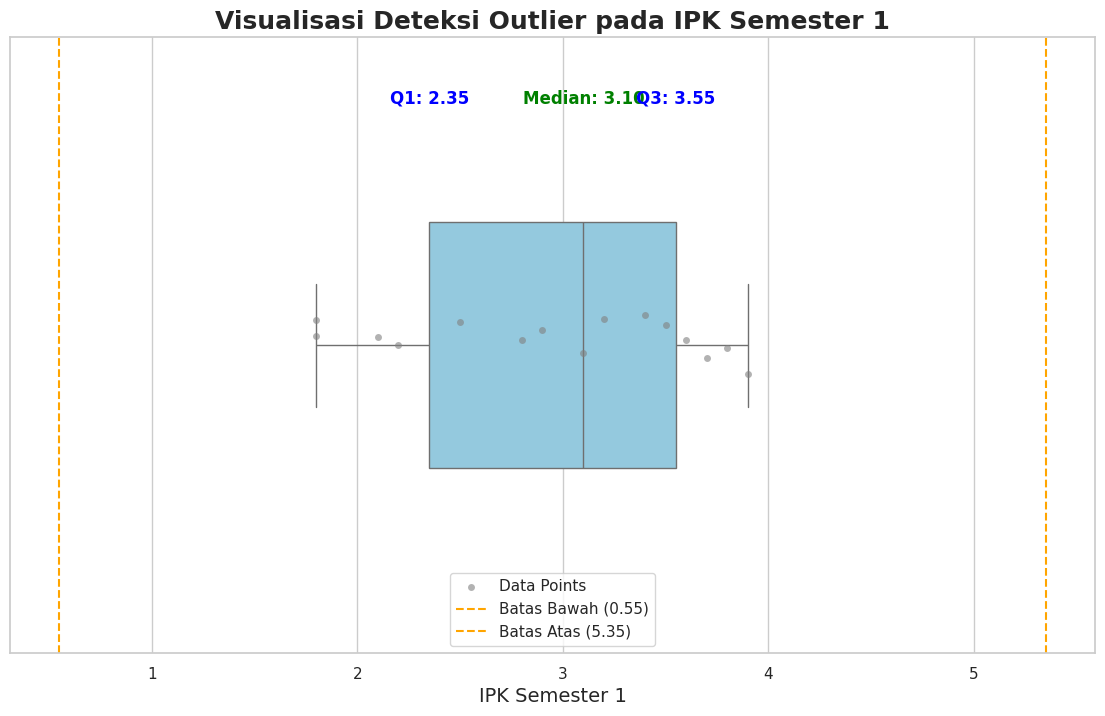

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Visualisasi Outlier yang Ditingkatkan ---")

# --- Perhitungan Statistik (Sama seperti sebelumnya) ---
# Fokus pada kolom 'ipk_semester_1' dan hapus nilai NaN untuk perhitungan
ipk_non_null = df_db['ipk_semester_1'].dropna()

# Hitung Q1, Q3, dan IQR
Q1 = ipk_non_null.quantile(0.25)
Q3 = ipk_non_null.quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Temukan outlier
outliers = df_db[(df_db['ipk_semester_1'] < batas_bawah) | (df_db['ipk_semester_1'] > batas_atas)]

print(f"Batas Bawah IQR: {batas_bawah:.2f}")
print(f"Batas Atas IQR: {batas_atas:.2f}")
if not outliers.empty:
    print(f"Ditemukan {len(outliers)} outlier pada IPK: {list(outliers['ipk_semester_1'])}")

# --- Visualisasi yang Ditingkatkan ---
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# 1. Membuat Box Plot utama
sns.boxplot(x=df_db['ipk_semester_1'], color='skyblue', width=0.4, fliersize=0)

# 2. Menambahkan Strip Plot untuk melihat sebaran semua titik data
sns.stripplot(x=df_db['ipk_semester_1'], color='gray', jitter=0.05, alpha=0.6, label='Data Points')

# 3. Menyorot Outlier dengan warna berbeda
if not outliers.empty:
    sns.stripplot(x=outliers['ipk_semester_1'], color='red', size=10, marker='D', label='Outliers')

# --- Menambahkan Anotasi dan Garis Batas ---
# Garis batas bawah dan atas IQR
plt.axvline(x=batas_bawah, color='orange', linestyle='--', label=f'Batas Bawah ({batas_bawah:.2f})')
plt.axvline(x=batas_atas, color='orange', linestyle='--', label=f'Batas Atas ({batas_atas:.2f})')

# Anotasi untuk Q1, Median, dan Q3
plt.text(Q1, -0.4, f'Q1: {Q1:.2f}', ha='center', va='center', color='blue', weight='bold')
plt.text(df_db['ipk_semester_1'].median(), -0.4, f'Median: {df_db["ipk_semester_1"].median():.2f}', ha='center', va='center', color='green', weight='bold')
plt.text(Q3, -0.4, f'Q3: {Q3:.2f}', ha='center', va='center', color='blue', weight='bold')

# --- Memperjelas Tampilan Grafik ---
plt.title('Visualisasi Deteksi Outlier pada IPK Semester 1', fontsize=18, weight='bold')
plt.xlabel('IPK Semester 1', fontsize=14)
plt.yticks([]) # Menghilangkan sumbu Y karena tidak relevan
plt.legend()
plt.show()

**Kesimpulan:**
Berdasarkan analisis numerik dan visual dari grafik Anda, dapat disimpulkan bahwa `TIDAK ADA OUTLIER` pada data IPK Semester 1. Semua nilai, meskipun bervariasi, masih berada dalam rentang statistik yang wajar.

**Implikasi untuk Proyek:**
Ini adalah kabar baik. Tidak adanya outlier berarti data IPK Semester 1 cukup bersih dari nilai-nilai ekstrem yang bisa disebabkan oleh kesalahan input. Dengan demikian, pada Tahap `Data Preparation`, kita tidak perlu melakukan perlakuan khusus untuk outlier pada kolom ini dan bisa fokus pada masalah kualitas data lain yang sudah kita temukan (seperti missing values dan data tidak konsisten).